In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("fitness_productivity_data.xlsx")


In [67]:
#clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [3]:
for col in df.columns:
    print(col)


timestamp
score
1)_what_is_your_name
2)_what_is_your_gender?
3)_do_you_drink_coffee_daily?
4)_when_are_you_most_productive?
5)where_do_you_currently_spend_most_of_your_time_working/studying?
6)_do_you_listen_to_music_while_working/studying?
7)what_is_your_age_group?
8)how_many_steps_do_you_walk_per_day_(on_average)?
9)_how_many_minutes_do_you_exercise_daily_(on_average)?
10)_how_many_liters_of_water_do_you_drink_daily?
11)_how_many_hours_do_you_sleep_daily_(on_average)?
12)_how_would_you_rate_your_concentration_level_today?
13)how_would_you_rate_your_mood_today?
14)_on_which_date_did_you_track_your_fitness/productivity?
15)_what_time_did_you_wake_up_today?
16)_at_what_time_did_you_sleep_last_night?


In [4]:
df = df.rename(columns={
    '2)_what_is_your_gender?': 'gender',
    '7)what_is_your_age_group?': 'age_group',
    '3)_do_you_drink_coffee_daily?': 'coffee_consumption',
    '5)where_do_you_currently_spend_most_of_your_time_working/studying?': 'workspace',
    '6)_do_you_listen_to_music_while_working/studying?': 'music_while_working',
    '4)_when_are_you_most_productive?': 'productive_time',
    '8)how_many_steps_do_you_walk_per_day_(on_average)?': 'daily_steps',
    '9)_how_many_minutes_do_you_exercise_daily_(on_average)?': 'exercise_minutes',
    '10)_how_many_liters_of_water_do_you_drink_daily?': 'water_liters',
    '11)_how_many_hours_do_you_sleep_daily_(on_average)?': 'sleep_hours',
    '12)_how_would_you_rate_your_concentration_level_today?': 'concentration',
    '13)how_would_you_rate_your_mood_today?': 'mood'
})


In [ ]:
df.dtypes


,0
timestamp,object
score,float64
1)_what_is_your_name,object
gender,object
coffee_consumption,object
productive_time,object
workspace,object
music_while_working,object
age_group,object
daily_steps,object


In [5]:
step_map = {
    'Less than 2000': 1000,
    '2000-5000': 3500,
    '5001-8000': 6500,
    '8001-10000': 9000
}

df['daily_steps_num'] = df['daily_steps'].map(step_map)
df['daily_steps_num'] = df['daily_steps_num'].fillna(df['daily_steps_num'].median())


In [6]:
water_map = {
    '1-2': 1.5,
    '2-3': 2.5,
    '3-4': 3.5,
    'More than 4': 4.5
}

df['water_liters_num'] = df['water_liters'].map(water_map)
df['water_liters_num'] = df['water_liters_num'].fillna(df['water_liters_num'].median())


In [7]:
df['sleep_hours_num'] = pd.to_numeric(df['sleep_hours'], errors='coerce')
df['sleep_hours_num'] = df['sleep_hours_num'].fillna(df['sleep_hours_num'].median())


In [8]:
df['exercise_minutes_num'] = pd.to_numeric(df['exercise_minutes'], errors='coerce')
df['exercise_minutes_num'] = df['exercise_minutes_num'].fillna(0)


In [9]:
df['concentration_num'] = pd.to_numeric(df['concentration'], errors='coerce')
df['mood_num'] = pd.to_numeric(df['mood'], errors='coerce')

df['concentration_num'] = df['concentration_num'].fillna(df['concentration_num'].median())
df['mood_num'] = df['mood_num'].fillna(df['mood_num'].median())


In [10]:
total = df.shape[0]
total


123

In [11]:
df['gender'].value_counts()


,count
gender,
Female,66
Male,35
0,1


In [12]:
df['age_group'].value_counts()


,count
age_group,
18-22,78
Under 18,10
23-27,7
28 or above,4


In [13]:
df['coffee_consumption'].value_counts()


,count
coffee_consumption,
No,51
Yes,50


<Axes: title={'center': 'Workspace Distribution'}, ylabel='count'>

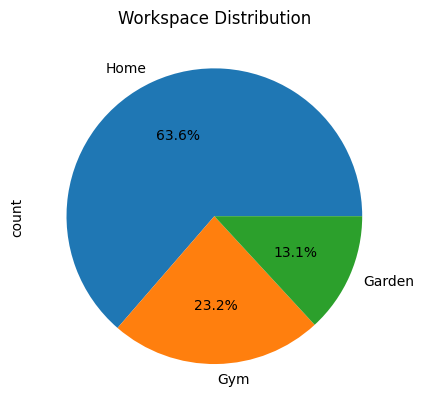

In [14]:
df['workspace'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Workspace Distribution')


In [15]:
df['productive_time'].value_counts()


,count
productive_time,
Morning,59
Night,43


In [16]:
pd.crosstab(df['productive_time'], df['coffee_consumption'])


coffee_consumption,No,Yes
productive_time,,
Morning,31,27
Night,19,23


In [17]:
df.groupby('music_while_working')['concentration'].mean()


,concentration
music_while_working,
No,3.230769
Yes,2.971831


In [18]:
df['music_while_working'].value_counts(normalize=True) * 100


,proportion
music_while_working,
Yes,74.257426
No,25.742574


In [19]:
df.groupby('workspace')['concentration'].mean()


,concentration
workspace,
Garden,2.833333
Gym,2.956522
Home,3.150000


In [64]:
df['exercise_daily'] = df['exercise_num'].apply(lambda x: 'Yes' if x > 0 else 'No')
df['exercise_daily'].value_counts()


,count
exercise_daily,
Yes,70
No,53


In [21]:
df['daily_steps_num'].mean()


np.float64(4569.1056910569105)

In [22]:
(df['daily_steps'] == 'Less than 2000').sum()


np.int64(15)

In [65]:
df[['exercise_num','concentration']].dropna().corr()


,exercise_num,concentration
exercise_num,1.000000,0.200264
concentration,0.200264,1.000000


In [23]:
df.groupby('age_group')['daily_steps_num'].mean()


,daily_steps_num
age_group,
18-22,5089.743590
23-27,5642.857143
28 or above,4375.000000
Under 18,2600.000000


In [24]:
df['sleep_hours'].unique()


array(['5–6 hours', 'More than 8 hours', 'Less than 5 hours', '6–7 hours',
       '7–8 hours', nan], dtype=object)

In [25]:
sleep_map = {
    'Less than 5 hours': 4,
    '5–6 hours': 5.5,
    '6–7 hours': 6.5,
    '7–8 hours': 7.5,
    'More than 8 hours': 9
}

df['sleep_num'] = df['sleep_hours'].map(sleep_map)
df['sleep_num'] = df['sleep_num'].fillna(df['sleep_num'].median())


In [26]:
df['sleep_num'].isna().sum()   # should be 0
df['sleep_num'].mean()


np.float64(7.0528455284552845)

In [27]:
df['water_liters'].unique()


array(['1–1.5 liters', 'More than 3 liters', '2.6–3 liters',
       '1.6–2.5 liters', 'Less than 1 liter', nan], dtype=object)

In [28]:
water_map = {
    'Less than 1 liter': 0.5,
    '1–1.5 liters': 1.25,
    '1.6–2.5 liters': 2.05,
    '2.6–3 liters': 2.8,
    'More than 3 liters': 3.5
}

df['water_num'] = df['water_liters'].map(water_map)
df['water_num'] = df['water_num'].fillna(df['water_num'].median())


In [29]:
df['water_num'].isna().sum()   # should be 0
df['water_num'].mean()


np.float64(2.415447154471545)

In [30]:
df['sleep_num'].mean()


np.float64(7.0528455284552845)

In [31]:
(df['sleep_num'] < 5).sum()


np.int64(6)

In [32]:
(df['sleep_num'] > 8).sum()


np.int64(8)

In [33]:
df['sleep_num'].corr(df['mood'])


np.float64(0.22033237056262894)

In [34]:
(df['water_num'] > 3).sum()


np.int64(10)

In [35]:
df['mood'].unique()

array([ 3.,  2.,  1.,  4.,  5., nan])

In [36]:
df['mood_num'] = pd.to_numeric(df['mood'], errors='coerce')
df['mood_num'] = df['mood_num'].fillna(df['mood_num'].median())


In [37]:
step_map = {
    'Less than 2000': 1000,
    '2000-5000': 3500,
    '5001-8000': 6500,
    '8001-10000': 9000
}

df['daily_steps_num'] = df['daily_steps'].map(step_map)
df['daily_steps_num'] = df['daily_steps_num'].fillna(df['daily_steps_num'].median())


In [38]:
df['daily_steps_num'].corr(df['mood_num'])


np.float64(0.12583118403998783)

In [39]:
df['exercise_num'] = pd.to_numeric(df['exercise_minutes'], errors='coerce')



In [40]:
df.groupby('coffee_consumption')['exercise_num'].mean()


,exercise_num
coffee_consumption,
No,NaN
Yes,NaN


In [41]:
df.groupby(['daily_steps','exercise_num']).size().sort_values(ascending=False).head(1)


,,0
daily_steps,exercise_num,


In [42]:
df.groupby('age_group')['water_num'].mean()


,water_num
age_group,
18-22,2.342949
23-27,2.792857
28 or above,2.225000
Under 18,1.960000


In [43]:
df.groupby('music_while_working')[['mood_num','concentration']].mean()


,mood_num,concentration
music_while_working,,
No,2.807692,3.230769
Yes,3.373333,2.971831


In [44]:
df['concentration'].mean()


np.float64(3.0606060606060606)

In [45]:
df['mood_num'].mean()


np.float64(3.2113821138211383)

In [46]:
df['concentration'].corr(df['sleep_num'])


np.float64(0.30619755892974676)

In [47]:
df['exercise_regular'] = df['exercise_num'].apply(lambda x: 'Yes' if x > 0 else 'No')
df.groupby('exercise_regular')['mood_num'].mean()


,mood_num
exercise_regular,
No,3.211382


In [48]:
df.groupby('productive_time')['mood_num'].mean()


,mood_num
productive_time,
Morning,3.237288
Night,3.302326


In [49]:
df.groupby(['age_group','gender','workspace'])[['concentration','mood_num']].mean()\
  .sort_values(['concentration','mood_num'], ascending=False).head(1)


,,,concentration,mood_num
age_group,gender,workspace,,
28 or above,Female,Home,5.0,3.0


In [50]:
df['exercise_minutes'].unique()


array(['I don’t exercise', 'More than 60 mins', 'Less than 15 mins',
       '15-30 mins', '31-60 mins', nan], dtype=object)

In [51]:
exercise_map = {
    'I don’t exercise': 0,
    'Less than 15 mins': 10,
    '15-30 mins': 22,
    '31-60 mins': 45,
    'More than 60 mins': 75
}

df['exercise_num'] = df['exercise_minutes'].map(exercise_map)


In [61]:
df[['exercise_num','concentration']].dropna().corr()


,exercise_num,concentration
exercise_num,1.000000,0.200264
concentration,0.200264,1.000000


In [62]:
df['exercise_num'].isna().sum()
df[['exercise_minutes','exercise_num']].head()


,exercise_minutes,exercise_num
0,I don’t exercise,0.0
1,More than 60 mins,75.0
2,Less than 15 mins,10.0
3,I don’t exercise,0.0
4,I don’t exercise,0.0


In [63]:
df.groupby('coffee_consumption')['exercise_num'].mean()


,exercise_num
coffee_consumption,
No,21.163265
Yes,35.816327


In [54]:
sleep_map = {
    'Less than 5 hours': 4,
    '5–6 hours': 5.5,
    '6–7 hours': 6.5,
    '7–8 hours': 7.5,
    'More than 8 hours': 9
}

df['sleep_num'] = df['sleep_hours'].map(sleep_map)


In [55]:
df['sleep_num'].isna().sum()
df[['sleep_hours','sleep_num']].head()


,sleep_hours,sleep_num
0,5–6 hours,5.5
1,More than 8 hours,9.0
2,5–6 hours,5.5
3,Less than 5 hours,4.0
4,6–7 hours,6.5


In [56]:
water_map = {
    'Less than 1 liter': 0.8,
    '1–1.5 liters': 1.25,
    '1.6–2.5 liters': 2.0,
    '2.6–3 liters': 2.8,
    'More than 3 liters': 3.5
}

df['water_num'] = df['water_liters'].map(water_map)


In [57]:
df[['water_num','sleep_num','concentration']].corr()


,water_num,sleep_num,concentration
water_num,1.000000,0.181310,0.378516
sleep_num,0.181310,1.000000,0.298517
concentration,0.378516,0.298517,1.000000


In [58]:
df.groupby(['exercise_regular','music_while_working'])[['sleep_num','mood_num']].mean()\
  .sort_values('mood_num', ascending=False).head(1)


,,sleep_num,mood_num
exercise_regular,music_while_working,,
No,Yes,6.895833,3.373333


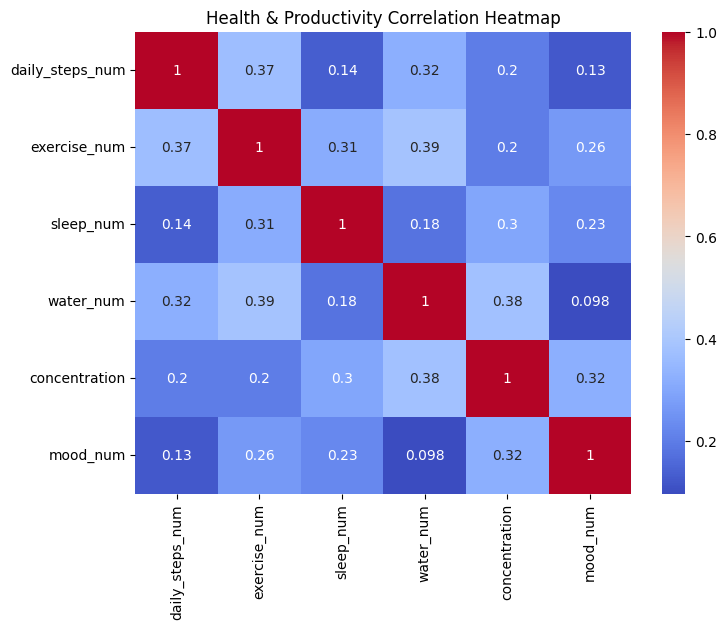

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['daily_steps_num','exercise_num','sleep_num','water_num','concentration','mood_num']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Health & Productivity Correlation Heatmap')
plt.show()
